<a href="https://colab.research.google.com/github/dinhquy-nguyen-1704/Mini_project/blob/main/Image_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
dataset_path = "image_retrieval_dataset/images_mr"
images_filename = os.listdir(dataset_path)
src_images = []

for filename in images_filename:
    filepath = os.path.join(dataset_path, filename)
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    src_images.append(image)

In [5]:
# Resize
def image_resize(image, target_size=(64, 64)):
    resize_image = cv2.resize(image, target_size)

    return resize_image

In [6]:
# Normalize
def calculate_mean_std(images):
    mean = np.mean(images, axis = (0, 1, 2))
    std = np.std(images, axis = (0, 1, 2))

    return mean, std

In [7]:
def image_normalize(image, mean, std):
    normalized_image = (image - mean)/std

    return normalized_image

In [8]:
def image_flatten(image, is_batch = False):
    if is_batch:
        flattened_image = image.reshape(image.shape[0], -1)
    else:
        flattened_image = image.reshape(-1)

    return flattened_image

In [9]:
def preprocess_batches(src_images):
    resized_images = [image_resize(image) for image in src_images]
    images_arr = np.array(resized_images)
    mean, std = calculate_mean_std(images_arr)
    normalized_images = image_normalize(images_arr, mean, std)
    flattened_images = image_flatten(normalized_images, is_batch = True)

    return flattened_images, mean, std

flattened_images, mean, std = preprocess_batches(src_images)

In [10]:
def preprocess_query(image):
    resized_image = image_resize(image)
    normalized_image = image_normalize(resized_image, mean, std)
    flattened_image = image_flatten(normalized_image)

    return flattened_image

In [11]:
def cosine_similarity( query_vector, src_vectors):
    query_norm = np.linalg.norm(query_vector)
    normalized_query = query_vector/query_norm
    src_norms = np.linalg.norm(src_vectors, axis=1)
    normalized_src = src_vectors/src_norms[:, np.newaxis]

    cosine_similarity = np.dot(normalized_src, normalized_query)

    return cosine_similarity

In [12]:
def ranking(preprocessed_query_image, preprocessed_src_images, top_k=10):
    scores = cosine_similarity(preprocessed_query_image, preprocessed_src_images)
    ranked_list = np.argsort(scores)[::-1][:top_k]
    scores = scores[ranked_list]

    return ranked_list, scores

Query Image


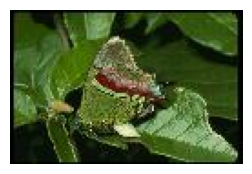

Top 5 results


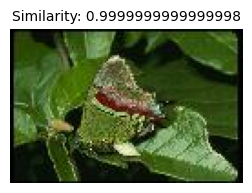

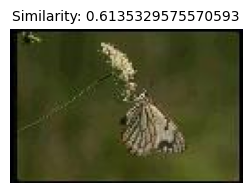

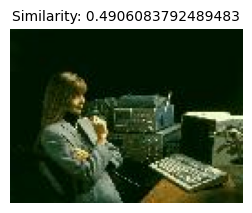

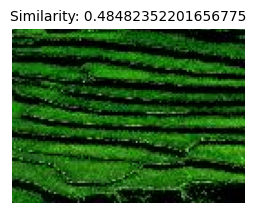

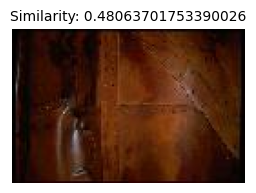

In [13]:
query_image_paths = ['image_retrieval_dataset/images_mr/1.jpg']
top_k = 5

for query_image_path in query_image_paths:
    query_image = cv2.imread(query_image_path, 1)
    query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)
    preprocessed_query_image = preprocess_query(query_image)

    ranked_list, scores = ranking(preprocessed_query_image, flattened_images, top_k)

    print('Query Image')
    plt.figure(figsize=(3, 3))
    plt.imshow(query_image)
    plt.axis('off')
    plt.show()
    print(f'Top {top_k} results')

for idx in range(len(ranked_list)):
    src_image_idx = ranked_list[idx]
    similarity_score = scores[idx]
    plt.figure(figsize=(3, 3))
    plt.imshow(src_images[src_image_idx])
    plt.title(f'Similarity: {similarity_score}', fontsize=10)
    plt.axis('off')
    plt.show ()